In [219]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import glob 

In [220]:
# Install and load Feature Engineering-Holiday Package
!pip install holidays
import holidays
import datetime as dt
from holidays import country_holidays

In [221]:
# Set the path to the directory containing CSV files
csv_files_path = 'Data/*.csv'
#Use the glob module to get a list of all CSV files in the specified directory
file_list = glob.glob(csv_files_path)
file_list

['Data\\Chicago-Crime_2001.csv',
 'Data\\Chicago-Crime_2002.csv',
 'Data\\Chicago-Crime_2003.csv',
 'Data\\Chicago-Crime_2004.csv',
 'Data\\Chicago-Crime_2005.csv',
 'Data\\Chicago-Crime_2006.csv',
 'Data\\Chicago-Crime_2007.csv',
 'Data\\Chicago-Crime_2008.csv',
 'Data\\Chicago-Crime_2009.csv',
 'Data\\Chicago-Crime_2010.csv',
 'Data\\Chicago-Crime_2011.csv',
 'Data\\Chicago-Crime_2012.csv',
 'Data\\Chicago-Crime_2013.csv',
 'Data\\Chicago-Crime_2014.csv',
 'Data\\Chicago-Crime_2015.csv',
 'Data\\Chicago-Crime_2016.csv',
 'Data\\Chicago-Crime_2017.csv',
 'Data\\Chicago-Crime_2018.csv',
 'Data\\Chicago-Crime_2019.csv',
 'Data\\Chicago-Crime_2020.csv',
 'Data\\Chicago-Crime_2021.csv',
 'Data\\Chicago-Crime_2022.csv']

In [222]:
df = pd.concat([pd.read_csv(f) for f in file_list])
df

ID                    Date        Primary Type  \
0        1326041  01/01/2001 01:00:00 AM             BATTERY   
1        1319931  01/01/2001 01:00:00 PM             BATTERY   
2        1324743  01/01/2001 01:00:00 PM            GAMBLING   
3        1310717  01/01/2001 01:00:00 AM     CRIMINAL DAMAGE   
4        1318099  01/01/2001 01:00:00 AM             BATTERY   
...          ...                     ...                 ...   
238853  12938029  12/31/2022 12:50:00 PM             ASSAULT   
238854  12937822  12/31/2022 12:50:00 PM             ASSAULT   
238855  12937583  12/31/2022 12:52:00 AM             BATTERY   
238856  12938420  12/31/2022 12:52:00 PM             ASSAULT   
238857  12939906  12/31/2022 12:59:00 PM  DECEPTIVE PRACTICE   

                                    Description          Location Description  \
0                                        SIMPLE                     RESIDENCE   
1                                        SIMPLE                     RESIDENCE   
2                           ILLEGAL ILL LOTTERY                        STREET   
3                                    TO VEHICLE                        STREET   
4                                        SIMPLE       RESIDENCE PORCH/HALLWAY   
...                                         ...                           ...   
238853                                   SIMPLE                     APARTMENT   
238854                     AGGRAVATED - HANDGUN                     APARTMENT   
238855                                   SIMPLE                    BARBERSHOP   
238856                                   SIMPLE  COMMERCIAL / BUSINESS OFFICE   
238857  FINANCIAL IDENTITY THEFT $300 AND UNDER                     RESIDENCE   

        Arrest  Domestic  Beat  District  Ward   Latitude  Longitude  
0        False     False  1624      16.0   NaN  41.957850 -87.749185  
1        False      True   825       8.0   NaN  41.783892 -87.684841  
2         True     False   313       3.0   NaN  41.780412 -87.611970  
3        False     False  2424      24.0   NaN  42.012391 -87.678032  
4        False      True   214       2.0   NaN  41.819538 -87.620020  
...        ...       ...   ...       ...   ...        ...        ...  
238853   False     False  1014      10.0  24.0  41.855911 -87.719966  
238854   False      True   733       7.0   6.0  41.766546 -87.645669  
238855   False     False  1135      11.0  28.0  41.868829 -87.686098  
238856   False     False  1432      14.0  32.0  41.930693 -87.685657  
238857   False     False  1511      15.0  29.0        NaN        NaN  

[7713109 rows x 12 columns]

In [223]:
df['District'].value_counts()

8.0     518549
11.0    495947
6.0     450645
7.0     447273
25.0    439160
4.0     437746
3.0     391059
12.0    381247
9.0     377311
2.0     364725
19.0    345934
18.0    345666
5.0     342118
10.0    332395
15.0    331469
1.0     310778
14.0    298794
16.0    257949
22.0    252722
24.0    232700
17.0    222523
20.0    136112
31.0       236
21.0         4
Name: District, dtype: int64

# Which district had the most crimes: District 8
# Which district had the least crimes: District 21

In [224]:
days = pd.date_range(df['Date'].min(),df['Date'].max())
days

DatetimeIndex(['2001-01-01 01:00:00', '2001-01-02 01:00:00',
               '2001-01-03 01:00:00', '2001-01-04 01:00:00',
               '2001-01-05 01:00:00', '2001-01-06 01:00:00',
               '2001-01-07 01:00:00', '2001-01-08 01:00:00',
               '2001-01-09 01:00:00', '2001-01-10 01:00:00',
               ...
               '2022-12-22 01:00:00', '2022-12-23 01:00:00',
               '2022-12-24 01:00:00', '2022-12-25 01:00:00',
               '2022-12-26 01:00:00', '2022-12-27 01:00:00',
               '2022-12-28 01:00:00', '2022-12-29 01:00:00',
               '2022-12-30 01:00:00', '2022-12-31 01:00:00'],
              dtype='datetime64[ns]', length=8035, freq='D')

In [225]:
us_holidays = country_holidays('US')

In [226]:
holiday_list = [us_holidays.get(day) for day in days]

In [227]:
df['US Holiday'] = [us_holidays.get(day) for day in df['Date']]
df.head()

ID                    Date     Primary Type          Description  \
0  1326041  01/01/2001 01:00:00 AM          BATTERY               SIMPLE   
1  1319931  01/01/2001 01:00:00 PM          BATTERY               SIMPLE   
2  1324743  01/01/2001 01:00:00 PM         GAMBLING  ILLEGAL ILL LOTTERY   
3  1310717  01/01/2001 01:00:00 AM  CRIMINAL DAMAGE           TO VEHICLE   
4  1318099  01/01/2001 01:00:00 AM          BATTERY               SIMPLE   

      Location Description  Arrest  Domestic  Beat  District  Ward   Latitude  \
0                RESIDENCE   False     False  1624      16.0   NaN  41.957850   
1                RESIDENCE   False      True   825       8.0   NaN  41.783892   
2                   STREET    True     False   313       3.0   NaN  41.780412   
3                   STREET   False     False  2424      24.0   NaN  42.012391   
4  RESIDENCE PORCH/HALLWAY   False      True   214       2.0   NaN  41.819538   

   Longitude      US Holiday  
0 -87.749185  New Year's Day  
1 -87.684841  New Year's Day  
2 -87.611970  New Year's Day  
3 -87.678032  New Year's Day  
4 -87.620020  New Year's Day

In [228]:
df['Date'] = pd.to_datetime(df['Date'], format = '%m/%d/%Y %I:%M:%S %p', errors = 'coerce')

In [229]:
# Set 'Date' as index
df = df.set_index('Date')
df.head()

ID     Primary Type          Description  \
Date                                                                 
2001-01-01 01:00:00  1326041          BATTERY               SIMPLE   
2001-01-01 13:00:00  1319931          BATTERY               SIMPLE   
2001-01-01 13:00:00  1324743         GAMBLING  ILLEGAL ILL LOTTERY   
2001-01-01 01:00:00  1310717  CRIMINAL DAMAGE           TO VEHICLE   
2001-01-01 01:00:00  1318099          BATTERY               SIMPLE   

                        Location Description  Arrest  Domestic  Beat  \
Date                                                                   
2001-01-01 01:00:00                RESIDENCE   False     False  1624   
2001-01-01 13:00:00                RESIDENCE   False      True   825   
2001-01-01 13:00:00                   STREET    True     False   313   
2001-01-01 01:00:00                   STREET   False     False  2424   
2001-01-01 01:00:00  RESIDENCE PORCH/HALLWAY   False      True   214   

                     District  Ward   Latitude  Longitude      US Holiday  
Date                                                                       
2001-01-01 01:00:00      16.0   NaN  41.957850 -87.749185  New Year's Day  
2001-01-01 13:00:00       8.0   NaN  41.783892 -87.684841  New Year's Day  
2001-01-01 13:00:00       3.0   NaN  41.780412 -87.611970  New Year's Day  
2001-01-01 01:00:00      24.0   NaN  42.012391 -87.678032  New Year's Day  
2001-01-01 01:00:00       2.0   NaN  41.819538 -87.620020  New Year's Day

In [230]:
df = df.sort_index()
df

ID                Primary Type  \
Date                                                        
2001-01-01 00:00:00   3214584                       THEFT   
2001-01-01 00:00:00   1927872                       THEFT   
2001-01-01 00:00:00   4768442  OFFENSE INVOLVING CHILDREN   
2001-01-01 00:00:00   2280620                       THEFT   
2001-01-01 00:00:00   9755214                 SEX OFFENSE   
...                       ...                         ...   
2022-12-31 23:47:00  12938351                     ASSAULT   
2022-12-31 23:47:00  12938340           WEAPONS VIOLATION   
2022-12-31 23:50:00  12938426                     BATTERY   
2022-12-31 23:50:00  12938337         MOTOR VEHICLE THEFT   
2022-12-31 23:55:00  13024128           WEAPONS VIOLATION   

                                       Description  \
Date                                                 
2001-01-01 00:00:00  FINANCIAL ID THEFT: OVER $300   
2001-01-01 00:00:00        AGG: FINANCIAL ID THEFT   
2001-01-01 00:00:00  SEX ASSLT OF CHILD BY FAM MBR   
2001-01-01 00:00:00  FINANCIAL ID THEFT: OVER $300   
2001-01-01 00:00:00      AGG CRIMINAL SEXUAL ABUSE   
...                                            ...   
2022-12-31 23:47:00                         SIMPLE   
2022-12-31 23:47:00  UNLAWFUL POSSESSION - HANDGUN   
2022-12-31 23:50:00        DOMESTIC BATTERY SIMPLE   
2022-12-31 23:50:00                     AUTOMOBILE   
2022-12-31 23:55:00     RECKLESS FIREARM DISCHARGE   

                                  Location Description  Arrest  Domestic  \
Date                                                                       
2001-01-01 00:00:00                             STREET   False     False   
2001-01-01 00:00:00                          RESIDENCE   False     False   
2001-01-01 00:00:00                          RESIDENCE   False     False   
2001-01-01 00:00:00                          RESIDENCE   False     False   
2001-01-01 00:00:00  CHURCH/SYNAGOGUE/PLACE OF WORSHIP   False     False   
...                                                ...     ...       ...   
2022-12-31 23:47:00                             STREET    True     False   
2022-12-31 23:47:00                          APARTMENT    True     False   
2022-12-31 23:50:00                          APARTMENT   False      True   
2022-12-31 23:50:00                              ALLEY   False     False   
2022-12-31 23:55:00    RESIDENCE - YARD (FRONT / BACK)   False     False   

                     Beat  District  Ward   Latitude  Longitude  \
Date                                                              
2001-01-01 00:00:00  2221      22.0  21.0  41.732563 -87.669923   
2001-01-01 00:00:00   812       8.0   NaN  41.778094 -87.770137   
2001-01-01 00:00:00  2124       2.0   4.0  41.807275 -87.593707   
2001-01-01 00:00:00   915       9.0  20.0  41.806311 -87.674782   
2001-01-01 00:00:00  1022      10.0  24.0        NaN        NaN   
...                   ...       ...   ...        ...        ...   
2022-12-31 23:47:00  2221      22.0  21.0  41.727812 -87.660399   
2022-12-31 23:47:00  2221      22.0  21.0  41.727812 -87.660399   
2022-12-31 23:50:00  1523      15.0  29.0  41.882257 -87.763744   
2022-12-31 23:50:00  2431      24.0  49.0  42.009108 -87.666844   
2022-12-31 23:55:00  1522      15.0  29.0        NaN        NaN   

                         US Holiday  
Date                                 
2001-01-01 00:00:00  New Year's Day  
2001-01-01 00:00:00  New Year's Day  
2001-01-01 00:00:00  New Year's Day  
2001-01-01 00:00:00  New Year's Day  
2001-01-01 00:00:00  New Year's Day  
...                             ...  
2022-12-31 23:47:00            None  
2022-12-31 23:47:00            None  
2022-12-31 23:50:00            None  
2022-12-31 23:50:00            None  
2022-12-31 23:55:00            None  

[7713109 rows x 12 columns]

In [231]:
df['Year'] = df.index.year

In [232]:
df_year = df.groupby("Year").size()
df_year.head()

Year
2001    485886
2002    486807
2003    475985
2004    469422
2005    453773
dtype: int64

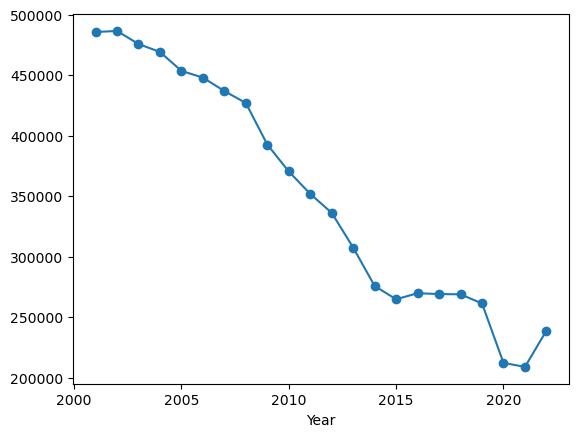

In [233]:
ax = df_year.plot(style='o-')

In [234]:
crime_by_year = df.groupby(['Primary Type'])['Year'].value_counts().sort_index()

In [235]:
crime_counts = df.groupby('Primary Type').resample('D').size()
crime_counts

Primary Type       Date      
ARSON              2001-01-03     1
                   2001-01-04     1
                   2001-01-05     3
                   2001-01-06     4
                   2001-01-07     0
                                 ..
WEAPONS VIOLATION  2022-12-27    12
                   2022-12-28    17
                   2022-12-29    11
                   2022-12-30    23
                   2022-12-31    58
Length: 261529, dtype: int64

In [236]:
plot_df = crime_by_year.to_frame('# of Crimes').reset_index()
plot_df.head()

Primary Type  Year  # of Crimes
0        ARSON  2001         1011
1        ARSON  2002         1032
2        ARSON  2003          955
3        ARSON  2004          778
4        ARSON  2005          691

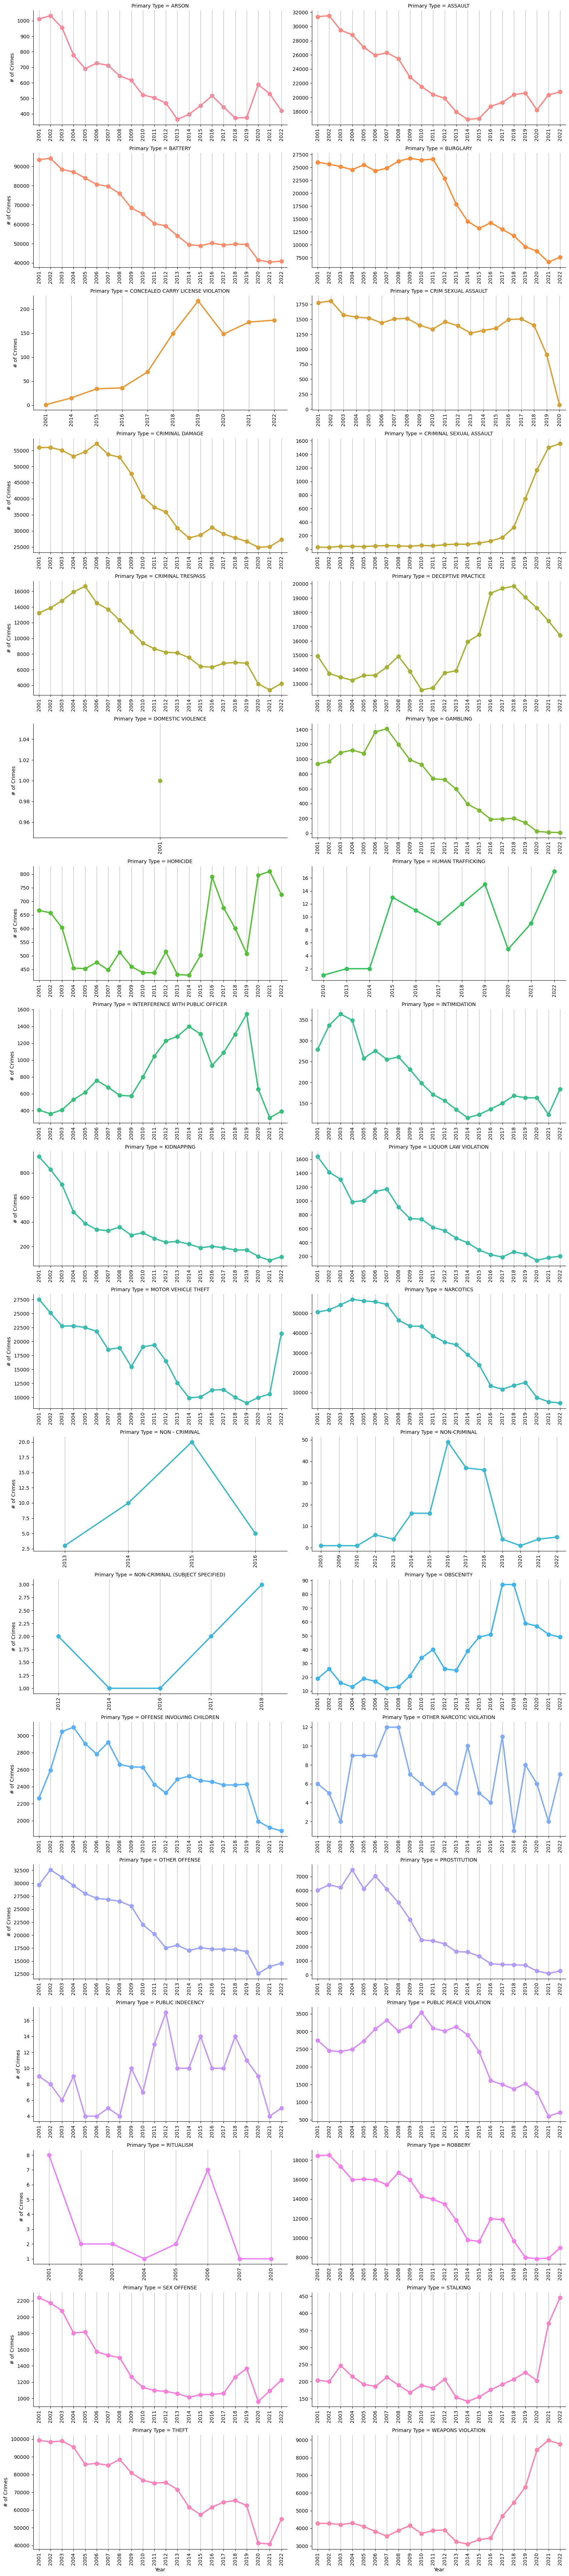

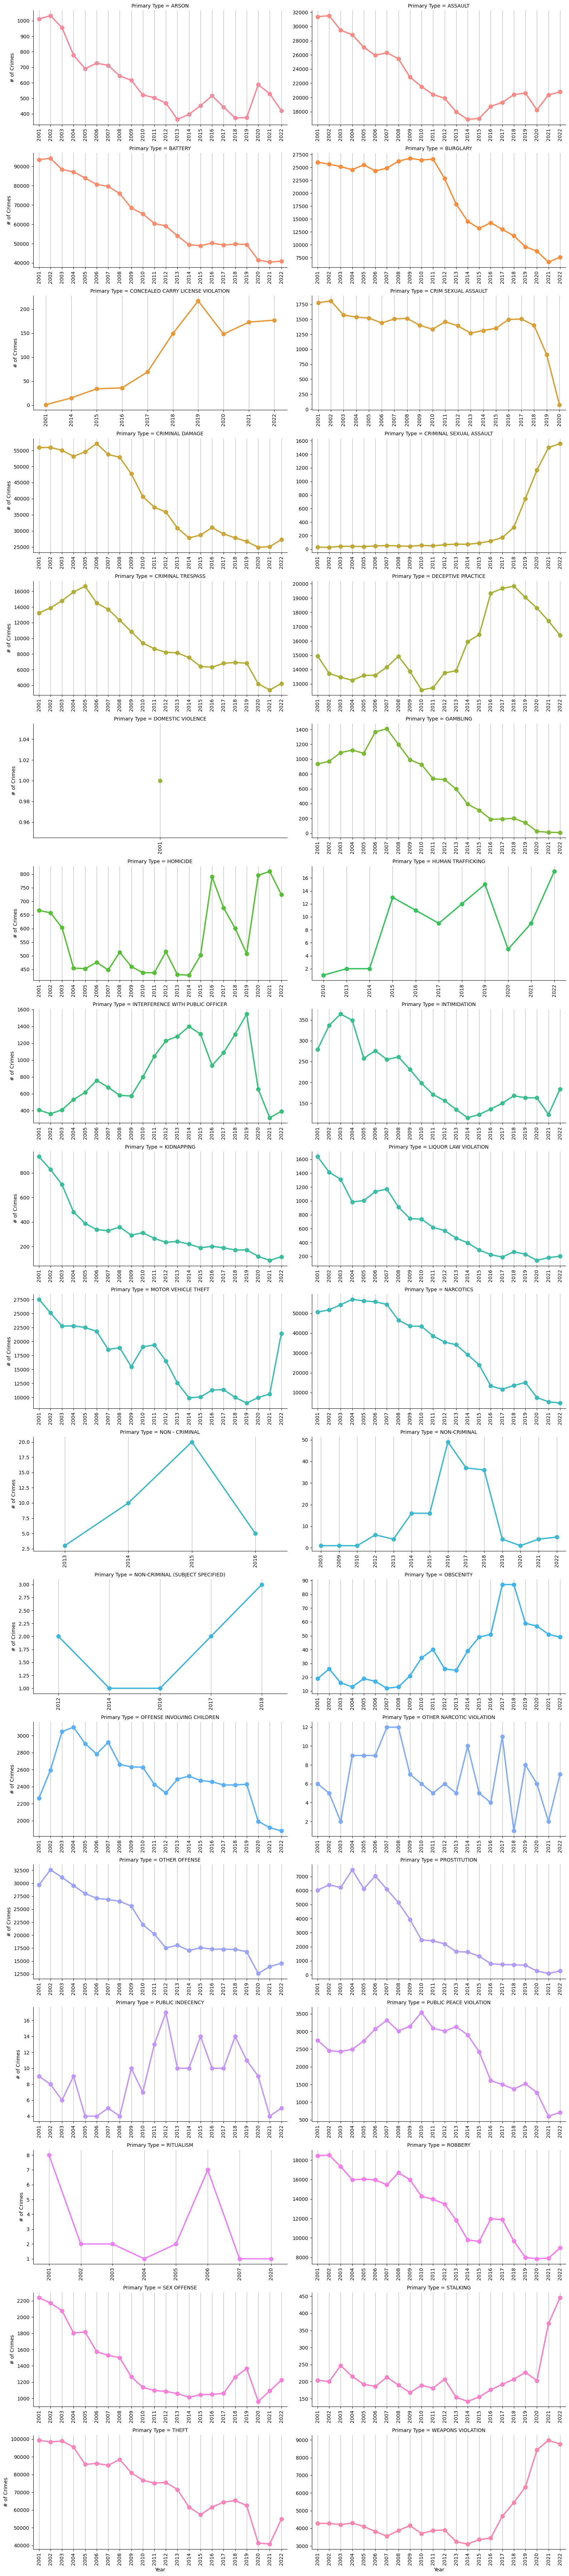

In [237]:
g = sns.catplot(data=plot_df, x='Year',y = '# of Crimes',
                kind = 'point',aspect=2, height = 4,
                hue = 'Primary Type', col = 'Primary Type', col_wrap = 2,
                sharey = False, sharex = False)
for ax in g.axes:
# ax.xaxis.set_major_locator(year_loc)
# ax.xaxis.set_major_formatter(year_fmt)
    ax.grid(axis = 'x')
    ax.tick_params(axis = 'x', rotation = 90)

g.fig.tight_layout()
g.fig

# Topic 5: What are the top 3 holidays with the largest number of crimes?

In [238]:
df['US Holiday'].value_counts()

New Year's Day                                     32725
Independence Day                                   22672
Labor Day                                          22164
Memorial Day                                       21125
Columbus Day                                       20920
Veterans Day                                       20418
Martin Luther King Jr. Day                         17916
Washington's Birthday                              17597
Thanksgiving                                       14798
Christmas Day                                      12418
Independence Day (Observed)                         5884
Veterans Day (Observed)                             5842
Christmas Day (Observed)                            4929
New Year's Day (Observed)                           4877
Juneteenth National Independence Day                1450
Juneteenth National Independence Day (Observed)     1403
Name: US Holiday, dtype: int64

In [239]:
holiday = df.groupby('US Holiday')['Primary Type'].value_counts()
holiday = holiday.to_frame('# of Crimes')
holiday

# of Crimes
US Holiday            Primary Type                                  
Christmas Day         BATTERY                                   3431
                      THEFT                                     1869
                      CRIMINAL DAMAGE                           1743
                      ASSAULT                                    883
                      OTHER OFFENSE                              854
...                                                              ...
Washington's Birthday GAMBLING                                    12
                      KIDNAPPING                                  11
                      INTIMIDATION                                10
                      STALKING                                     9
                      CONCEALED CARRY LICENSE VIOLATION            4

[443 rows x 1 columns]

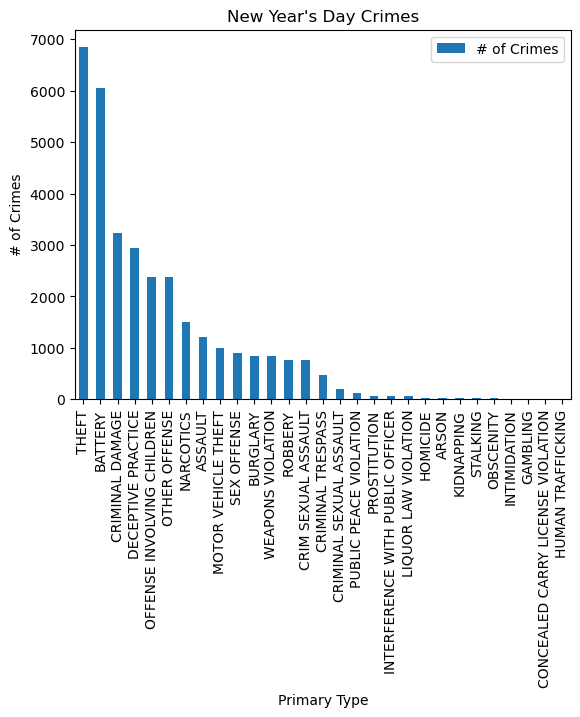

In [240]:
ax = holiday.loc["New Year's Day"].plot(kind='bar')
ax.set(title="New Year's Day Crimes",
       ylabel='# of Crimes');

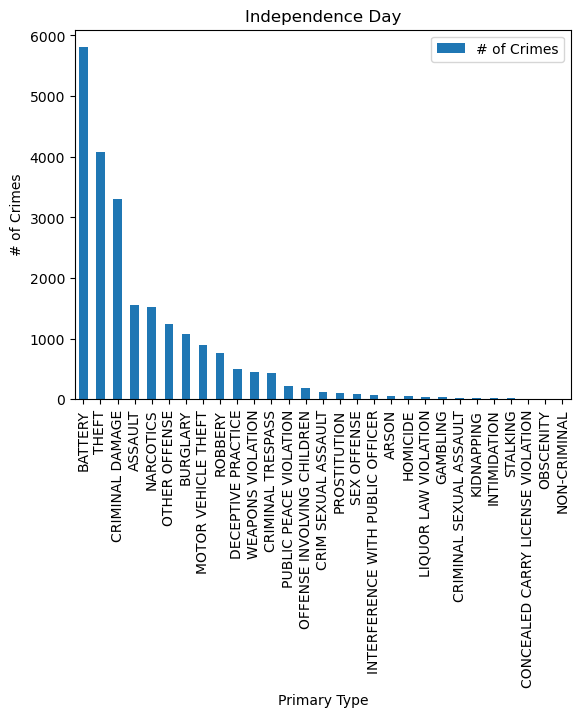

In [241]:
ax = holiday.loc["Independence Day"].plot(kind='bar')
ax.set(title="Independence Day",
       ylabel='# of Crimes');

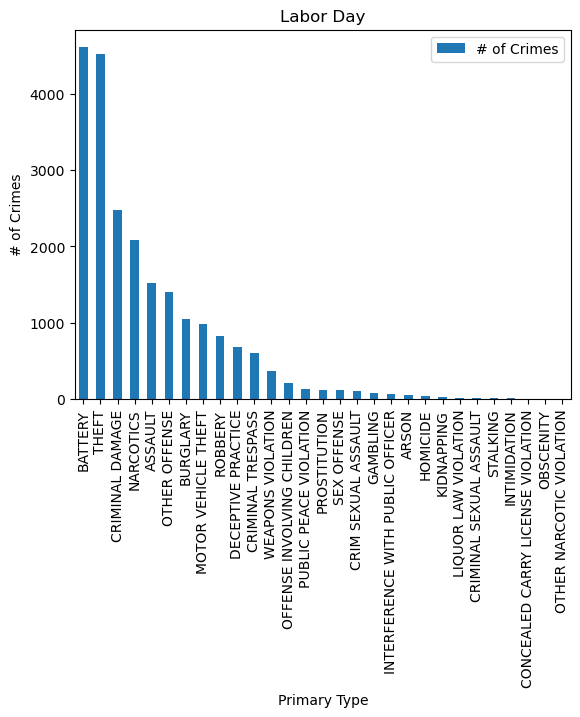

In [242]:
ax = holiday.loc["Labor Day"].plot(kind='bar')
ax.set(title="Labor Day",
       ylabel='# of Crimes');

# Part 2 SARIMA'S

In [243]:
df_ts = df.groupby('Primary Type').resample('M').size()
df_ts

Primary Type       Date      
ARSON              2001-01-31     67
                   2001-02-28     57
                   2001-03-31     93
                   2001-04-30     89
                   2001-05-31     94
                                ... 
WEAPONS VIOLATION  2022-08-31    832
                   2022-09-30    780
                   2022-10-31    735
                   2022-11-30    597
                   2022-12-31    543
Length: 8602, dtype: int64

In [244]:
df_ts.index.get_level_values(0)

Index(['ARSON', 'ARSON', 'ARSON', 'ARSON', 'ARSON', 'ARSON', 'ARSON', 'ARSON',
       'ARSON', 'ARSON',
       ...
       'WEAPONS VIOLATION', 'WEAPONS VIOLATION', 'WEAPONS VIOLATION',
       'WEAPONS VIOLATION', 'WEAPONS VIOLATION', 'WEAPONS VIOLATION',
       'WEAPONS VIOLATION', 'WEAPONS VIOLATION', 'WEAPONS VIOLATION',
       'WEAPONS VIOLATION'],
      dtype='object', name='Primary Type', length=8602)

# Battery crime count forecast

In [245]:
Battery = df_ts['BATTERY']

In [246]:
Battery.isna().sum()

0

<Axes: xlabel='Date'>

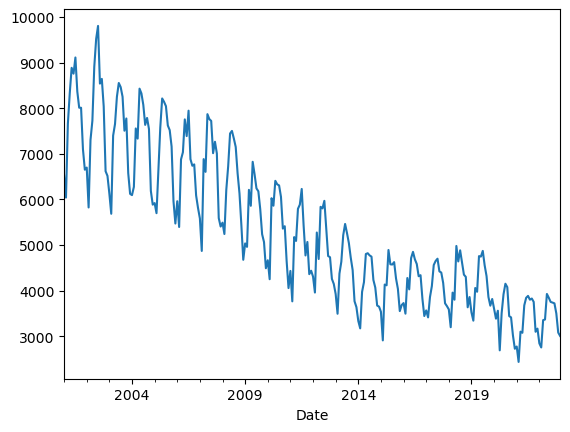

In [247]:
Battery.plot()

In [248]:
# Import packages
import statsmodels.tsa.api as tsa
from pmdarima.model_selection import train_test_split
from pmdarima.arima.utils import ndiffs, nsdiffs
import pmdarima as pm

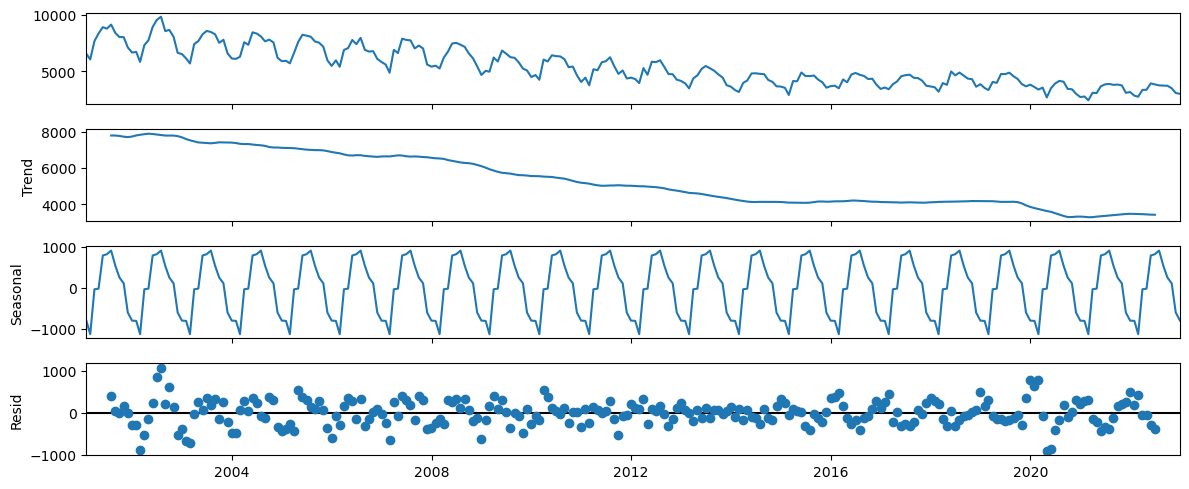

In [249]:
decomp = tsa.seasonal_decompose(Battery)
fig = decomp.plot()
fig.set_size_inches(12,5)
fig.tight_layout()

In [250]:
# How big is the seasonal component
seasonal_delta = decomp.seasonal.max() - decomp.seasonal.min()

# How big is the seasonal component relative to the time series?
print(f"The seasonal component is {seasonal_delta} which is ~{seasonal_delta/(Battery.max()-Battery.min()) * 100 :.2f}% of the variation in time series.")

The seasonal component is 2040.1289682539682 which is ~27.70% of the variation in time series.


In [251]:
ndiffs(Battery)

1

In [252]:
Battery_diff = Battery.diff().dropna()

<Axes: xlabel='Date'>

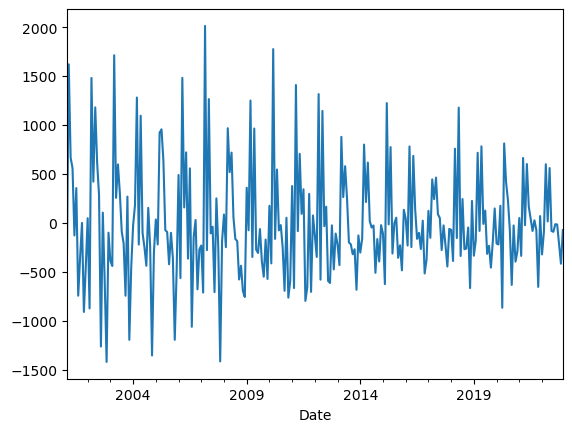

In [253]:
Battery_diff.plot()

In [254]:
# Import custom functions
def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None, 
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    ### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)

    # setting the number of train lags to plot if not specified
    if n_train_lags==None:
        n_train_lags = len(ts_train)
            
    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)

    # Plot forecast
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")

    # Add the shaded confidence interval
    ax.fill_between(forecast_df.index, 
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)

    # set the title and add legend
    ax.set_title(title)
    ax.legend();
    
    return fig, ax

In [255]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    # Get metrics
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse = mean_squared_error(ts_true, ts_pred, squared=False)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100

    if verbose == True:
        # Print Result with label
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")

    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics



In [256]:
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d, 
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags, 
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])


In [257]:
def plot_acf_pacf(ts, nlags=40, figsize=(10, 5), 
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},  
                  annotate_seas=False, m = None,
                 seas_color='black'):
    
    fig, axes = plt.subplots(nrows=2, figsize=figsize)

    
    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')

    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)
    
    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )

    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)
    
    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)



    
    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")

        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m 

        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)
        
        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")

    fig.tight_layout()
    
    return fig

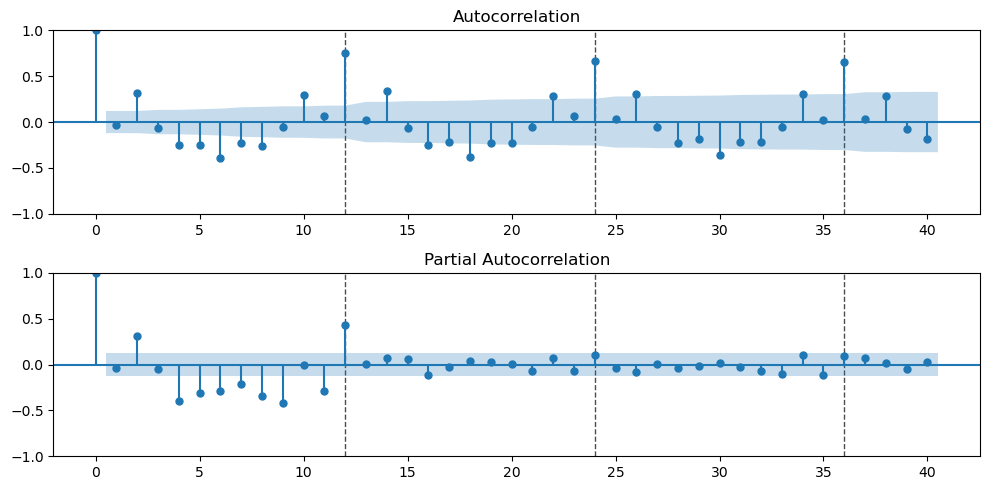

In [258]:
# We can use our function to highlight the seasonal lags by adding the arguments
# We can use our function to highlight the seasonal lags by adding the arguments
plot_acf_pacf(Battery_diff, annotate_seas=True, m = 12);



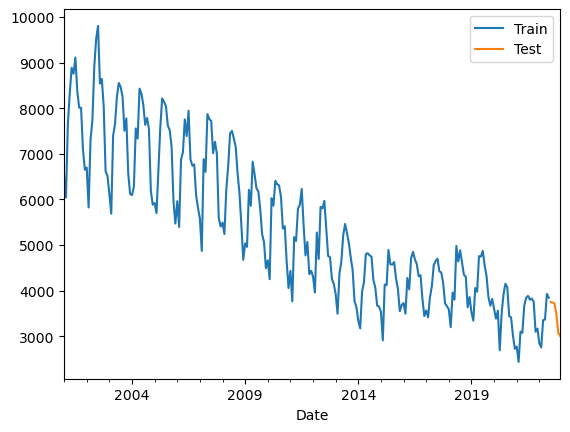

In [259]:
# tts
train, test = train_test_split(Battery, test_size=6)
ax = train.plot(label='Train')
test.plot(ax=ax, label='Test')
ax.legend();


In [260]:
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 0  # nonseasonal MA

# Orders for seasonal components
P = 1  # Seasonal AR
D = 1  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period

sarima = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

# Obtain summary
sarima.summary()



C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  258
Model:             ARIMA(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood               -1740.042
Date:                            Sun, 17 Mar 2024   AIC                           3488.083
Time:                                    23:15:38   BIC                           3502.088
Sample:                                01-31-2001   HQIC                          3493.723
                                     - 06-30-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3395      0.057     -5.956      0.000      -0.451      -0.228
ar.S.L12      -0.0121      0.098     -0.123      0.902      -0.204       0.180
ma.S.L12      -0.6953      0.077     -8.984      0.000      -0.847      -0.544
sigma2       8.25e+04   7174.694     11.499      0.000    6.84e+04    9.66e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.18   Jarque-Bera (JB):                 1.10
Prob(Q):                              0.28   Prob(JB):                         0.58
Heteroskedasticity (H):               0.50   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [261]:
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  258
Model:             ARIMA(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood               -1740.042
Date:                            Sun, 17 Mar 2024   AIC                           3488.083
Time:                                    23:15:38   BIC                           3502.088
Sample:                                01-31-2001   HQIC                          3493.723
                                     - 06-30-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3395      0.057     -5.956      0.000      -0.451      -0.228
ar.S.L12      -0.0121      0.098     -0.123      0.902      -0.204       0.180
ma.S.L12      -0.6953      0.077     -8.984      0.000      -0.847      -0.544
sigma2       8.25e+04   7174.694     11.499      0.000    6.84e+04    9.66e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.18   Jarque-Bera (JB):                 1.10
Prob(Q):                              0.28   Prob(JB):                         0.58
Heteroskedasticity (H):               0.50   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

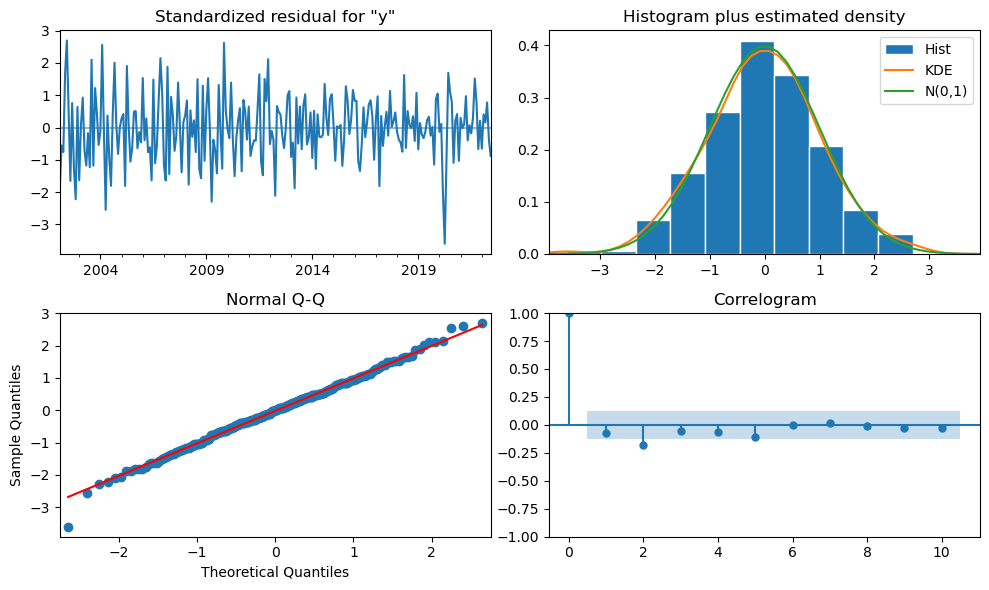

In [262]:
# Obtain diagnostic plots
fig = sarima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()



------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 132.612
- MSE = 21,561.860
- RMSE = 146.840
- R^2 = 0.777
- MAPE = 3.81%


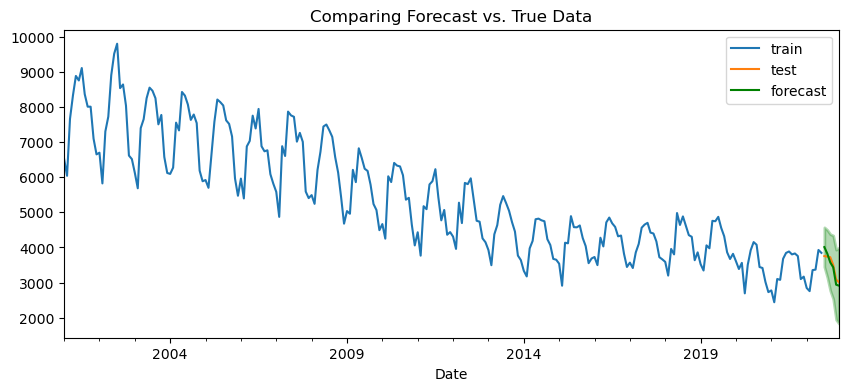

In [263]:
# Obtain summary of forecast as dataframe
forecast_df = sarima.get_forecast(len(test)).summary_frame()
# Plot the forecast with true values
plot_forecast(train, test, forecast_df)
# Obtain metrics
regression_metrics_ts(test, forecast_df["mean"])

In [264]:
import pmdarima as pm

# Default auto_arima will select model based on AIC score
auto_model = pm.auto_arima(
    train,
    seasonal=True,  
    m=12,
    trace=True
)



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3999.181, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3753.329, Time=0.21 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3872.017, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3997.267, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4000.706, Time=0.02 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=3680.737, Time=0.44 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=3870.170, Time=0.14 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.11 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=3682.671, Time=0.85 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3836.662, Time=0.38 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=3704.855, Time=0.36 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : 

C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(2,1,1)(1,0,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in 

 ARIMA(2,1,1)(1,0,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(1,1,1)(1,0,1)[12]             : AIC=inf, Time=0.32 sec
 ARIMA(3,1,1)(1,0,1)[12]             : AIC=inf, Time=0.98 sec

Best model:  ARIMA(2,1,0)(1,0,1)[12]          
Total fit time: 20.962 seconds


In [265]:
# the auto_arima will store our best nonseasonal and seasonal orders separtely
print(auto_model.order)
print(auto_model.seasonal_order)


(2, 1, 0)
(1, 0, 1, 12)


In [266]:
# Obtain summary of the best model from auto_arima
auto_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  258
Model:             SARIMAX(2, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -1833.518
Date:                              Sun, 17 Mar 2024   AIC                           3677.037
Time:                                      23:16:00   BIC                           3694.782
Sample:                                  01-31-2001   HQIC                          3684.173
                                       - 06-30-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3590      0.056     -6.388      0.000      -0.469      -0.249
ar.L2         -0.1261      0.055     -2.290      0.022      -0.234      -0.018
ar.S.L12       0.9840      0.006    169.147      0.000       0.973       0.995
ma.S.L12      -0.6853      0.057    -12.115      0.000      -0.796      -0.574
sigma2      8.026e+04   6989.281     11.484      0.000    6.66e+04     9.4e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.84
Prob(Q):                              0.94   Prob(JB):                         0.40
Heteroskedasticity (H):               0.42   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [267]:
# Auto model seasonal components
# Orders for non seasonal components
p = 2  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 0  # nonseasonal MA

# Orders for seasonal components
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period

sarima = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

# Obtain summary
sarima.summary()


C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  258
Model:             ARIMA(2, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -1833.518
Date:                            Sun, 17 Mar 2024   AIC                           3677.037
Time:                                    23:16:00   BIC                           3694.782
Sample:                                01-31-2001   HQIC                          3684.173
                                     - 06-30-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3590      0.056     -6.388      0.000      -0.469      -0.249
ar.L2         -0.1261      0.055     -2.290      0.022      -0.234      -0.018
ar.S.L12       0.9840      0.006    169.147      0.000       0.973       0.995
ma.S.L12      -0.6853      0.057    -12.115      0.000      -0.796      -0.574
sigma2      8.026e+04   6989.281     11.484      0.000    6.66e+04     9.4e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.84
Prob(Q):                              0.94   Prob(JB):                         0.40
Heteroskedasticity (H):               0.42   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

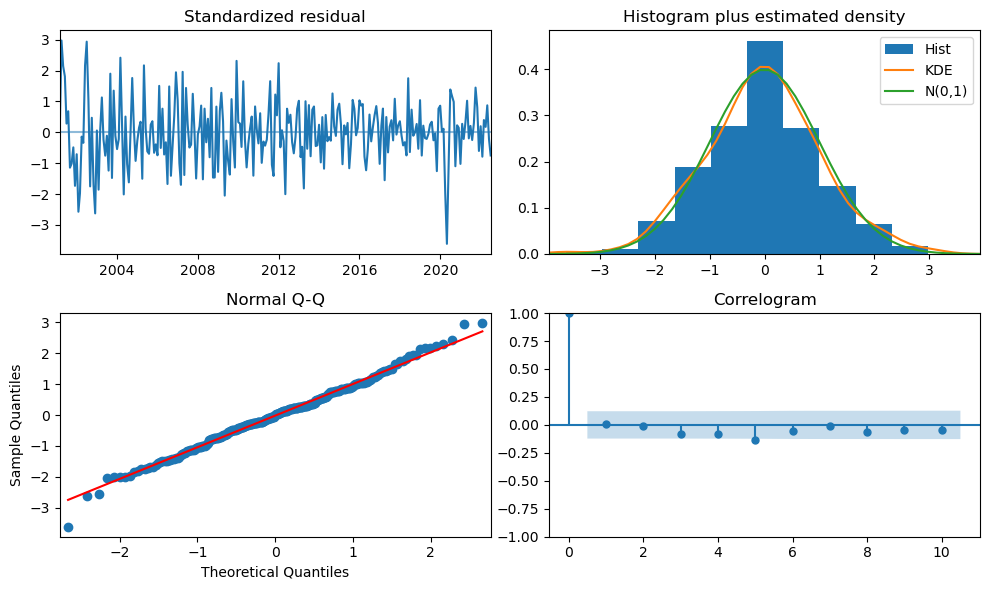

In [268]:
# Obtain diagnostic plots
fig = auto_model.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 95.192
- MSE = 17,440.342
- RMSE = 132.062
- R^2 = 0.820
- MAPE = 2.61%


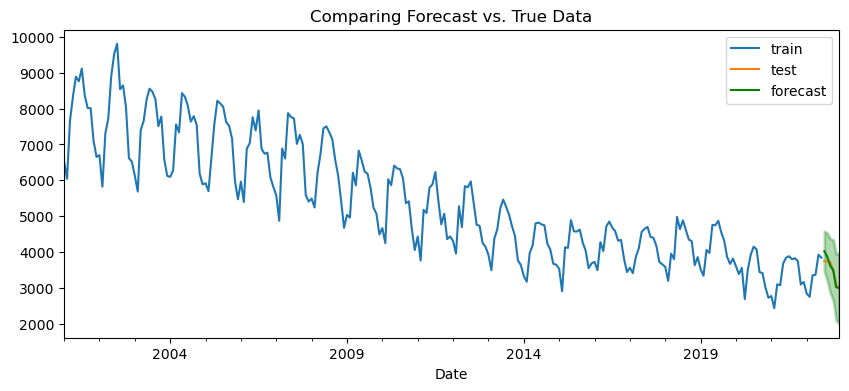

In [269]:
# Use auto_arima parameters to fit an ARIMA
auto_model = tsa.ARIMA(
    train, order=auto_model.order, seasonal_order=auto_model.seasonal_order
).fit()


# Obtain forecast as a dataframe with confidence intervals
forecast_df = auto_model.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])



# Final evaluation Battery Info

In [270]:
#Forecast mean
final_value = forecast_df['mean'].iloc[-1]
final_value

2999.6334203484917

In [271]:
starting_value = forecast_df['mean'].iloc[0]
starting_value

4027.1368995475764

In [272]:
change = final_value - starting_value
change

-1027.5034791990847

In [273]:
perc_change = (change / starting_value * 100)
perc_change

-25.51449093559542

# Theft crime count forecast

In [274]:
Theft = df_ts['THEFT']

In [275]:
Theft.isna().sum()

0

<Axes: xlabel='Date'>

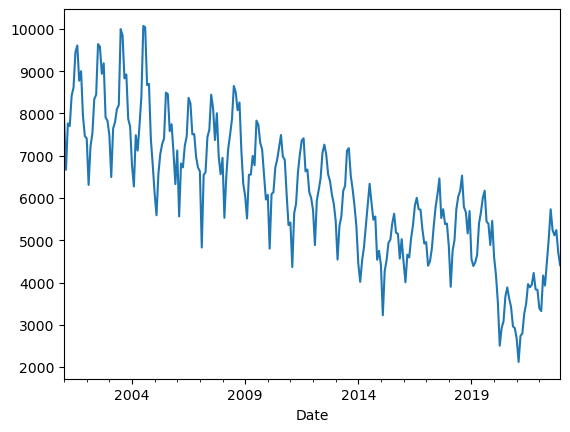

In [276]:
Theft.plot()

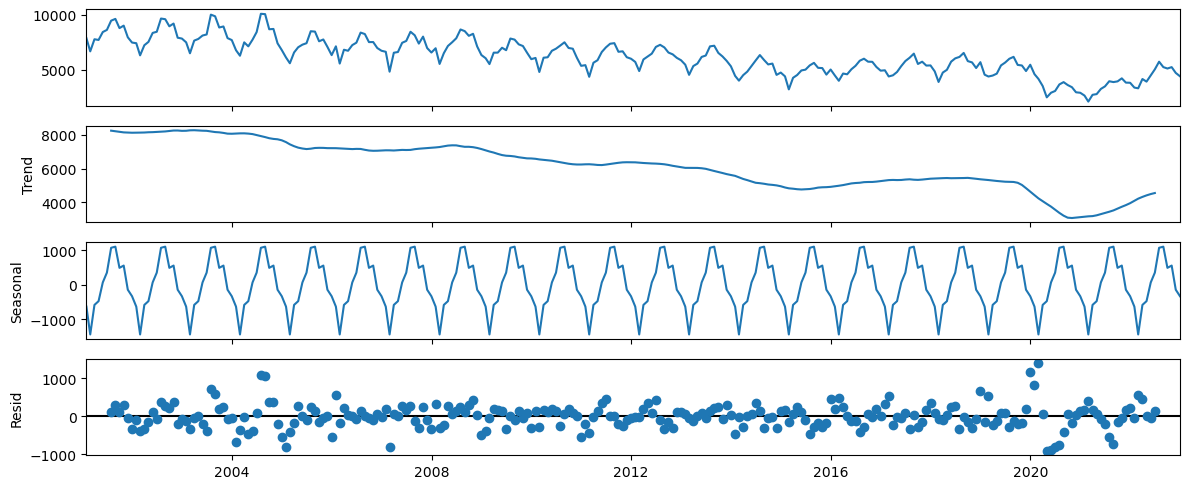

In [277]:
decomp = tsa.seasonal_decompose(Theft)
fig = decomp.plot()
fig.set_size_inches(12,5)
fig.tight_layout()

In [278]:
# How big is the seasonal component
seasonal_delta = decomp.seasonal.max() - decomp.seasonal.min()

# How big is the seasonal component relative to the time series?
print(f"The seasonal component is {seasonal_delta} which is ~{seasonal_delta/(Theft.max()-Theft.min()) * 100 :.2f}% of the variation in time series.")

The seasonal component is 2549.9880952380954 which is ~32.08% of the variation in time series.


In [279]:
ndiffs(Theft)

1

In [280]:
Theft_diff = Theft.diff().dropna()

<Axes: xlabel='Date'>

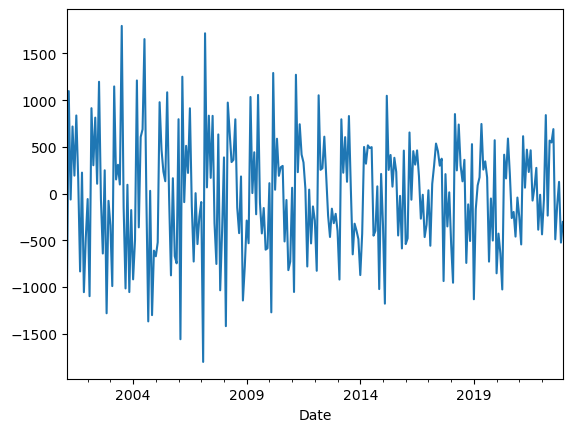

In [281]:
Theft_diff.plot()

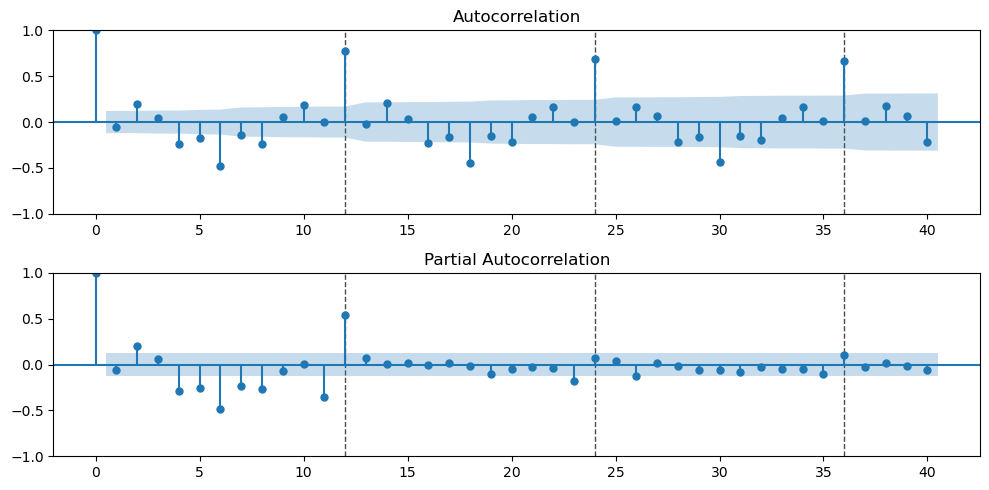

In [282]:
# We can use our function to highlight the seasonal lags by adding the arguments
# We can use our function to highlight the seasonal lags by adding the arguments
plot_acf_pacf(Theft_diff, annotate_seas=True, m = 12);

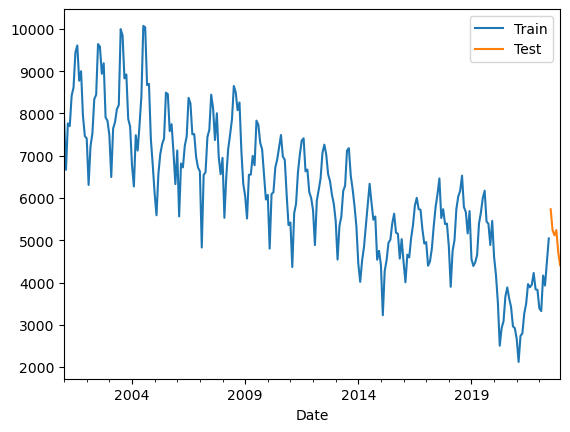

In [283]:
# tts
train, test = train_test_split(Theft, test_size=6)
ax = train.plot(label='Train')
test.plot(ax=ax, label='Test')
ax.legend();

In [284]:
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 0  # nonseasonal MA

# Orders for seasonal components
P = 1  # Seasonal AR
D = 1  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period

sarima = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

# Obtain summary
sarima.summary()


C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  258
Model:             ARIMA(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood               -1769.074
Date:                            Sun, 17 Mar 2024   AIC                           3546.148
Time:                                    23:16:03   BIC                           3560.153
Sample:                                01-31-2001   HQIC                          3551.788
                                     - 06-30-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2412      0.047     -5.172      0.000      -0.333      -0.150
ar.S.L12       0.1481      0.103      1.444      0.149      -0.053       0.349
ma.S.L12      -0.7496      0.068    -10.956      0.000      -0.884      -0.616
sigma2      1.043e+05   7176.620     14.539      0.000    9.03e+04    1.18e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                38.49
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.11   Skew:                            -0.40
Prob(H) (two-sided):                  0.63   Kurtosis:                         4.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [285]:
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  258
Model:             ARIMA(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood               -1769.074
Date:                            Sun, 17 Mar 2024   AIC                           3546.148
Time:                                    23:16:03   BIC                           3560.153
Sample:                                01-31-2001   HQIC                          3551.788
                                     - 06-30-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2412      0.047     -5.172      0.000      -0.333      -0.150
ar.S.L12       0.1481      0.103      1.444      0.149      -0.053       0.349
ma.S.L12      -0.7496      0.068    -10.956      0.000      -0.884      -0.616
sigma2      1.043e+05   7176.620     14.539      0.000    9.03e+04    1.18e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                38.49
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.11   Skew:                            -0.40
Prob(H) (two-sided):                  0.63   Kurtosis:                         4.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

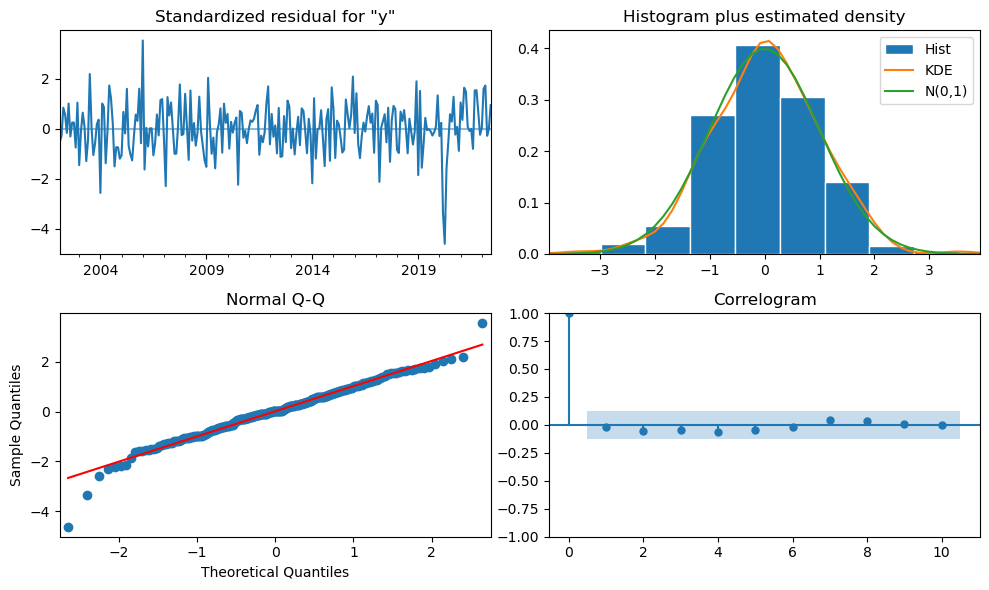

In [286]:
# Obtain diagnostic plots
fig = sarima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()


------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 208.278
- MSE = 67,274.456
- RMSE = 259.373
- R^2 = 0.619
- MAPE = 4.20%


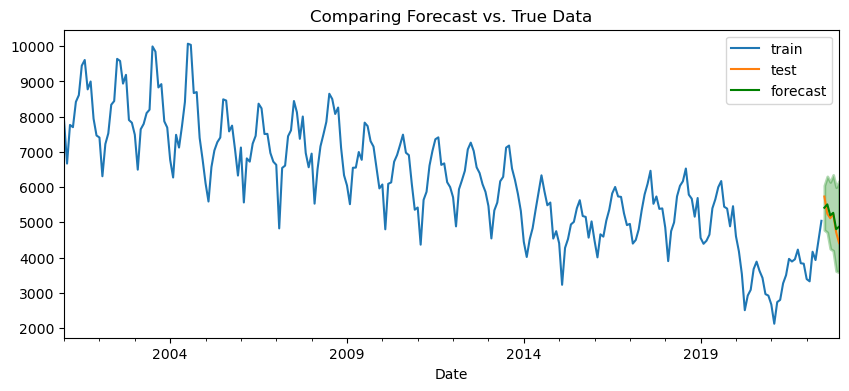

In [287]:
# Obtain summary of forecast as dataframe
forecast_df = sarima.get_forecast(len(test)).summary_frame()
# Plot the forecast with true values
plot_forecast(train, test, forecast_df)
# Obtain metrics
regression_metrics_ts(test, forecast_df["mean"])

In [288]:
import pmdarima as pm

# Default auto_arima will select model based on AIC score
auto_model = pm.auto_arima(
    train,
    seasonal=True,  
    m=12,
    trace=True
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4050.524, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3791.710, Time=0.15 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3914.631, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4048.603, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4050.805, Time=0.02 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=3774.214, Time=0.38 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=3743.854, Time=0.94 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=3743.960, Time=0.41 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=3742.900, Time=0.87 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3870.719, Time=0.37 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=3913.736, Time=0.13 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=3754.859, Time=0.70 sec
 ARIMA(2,1,0)(1,0,2)[12] inte

C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(1,1,0)(2,0,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in 

 ARIMA(1,1,0)(2,0,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(1,0,2)[12]             : AIC=3753.387, Time=0.34 sec
 ARIMA(2,1,0)(1,0,2)[12]             : AIC=3743.206, Time=1.08 sec
 ARIMA(1,1,1)(1,0,2)[12]             : AIC=inf, Time=1.07 sec
 ARIMA(0,1,1)(1,0,2)[12]             : AIC=3741.264, Time=0.94 sec
 ARIMA(0,1,1)(0,0,2)[12]             : AIC=3869.893, Time=0.34 sec
 ARIMA(0,1,1)(1,0,1)[12]             : AIC=3742.535, Time=0.22 sec
 ARIMA(0,1,1)(2,0,2)[12]             : AIC=inf, Time=1.79 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=3912.729, Time=0.11 sec
 ARIMA(0,1,1)(2,0,1)[12]             : AIC=3742.319, Time=0.72 sec
 ARIMA(0,1,2)(1,0,2)[12]             : AIC=3743.232, Time=0.68 sec
 ARIMA(1,1,2)(1,0,2)[12]             : AIC=inf, Time=1.76 sec

Best model:  ARIMA(0,1,1)(1,0,2)[12]          
Total fit time: 22.840 seconds


In [289]:
# the auto_arima will store our best nonseasonal and seasonal orders separtely
print(auto_model.order)
print(auto_model.seasonal_order)

(0, 1, 1)
(1, 0, 2, 12)


In [290]:
# Obtain summary of the best model from auto_arima
auto_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  258
Model:             SARIMAX(0, 1, 1)x(1, 0, [1, 2], 12)   Log Likelihood               -1865.632
Date:                                 Sun, 17 Mar 2024   AIC                           3741.264
Time:                                         23:16:27   BIC                           3759.009
Sample:                                     01-31-2001   HQIC                          3748.400
                                          - 06-30-2022                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2299      0.046     -5.014      0.000      -0.320      -0.140
ar.S.L12       0.9784      0.008    123.339      0.000       0.963       0.994
ma.S.L12      -0.5723      0.058     -9.829      0.000      -0.686      -0.458
ma.S.L24      -0.1250      0.068     -1.843      0.065      -0.258       0.008
sigma2      1.036e+05   7328.123     14.134      0.000    8.92e+04    1.18e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                32.77
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.44
Prob(H) (two-sided):                  0.34   Kurtosis:                         4.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [291]:
# Auto model seasonal components
# Orders for non seasonal components
p = 0  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 1  # nonseasonal MA

# Orders for seasonal components
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 2  # Seasonal MA
m = 12 # Seasonal period

sarima = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

# Obtain summary
sarima.summary()

C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                       
=============================================================================================
Dep. Variable:                                     y   No. Observations:                  258
Model:             ARIMA(0, 1, 1)x(1, 0, [1, 2], 12)   Log Likelihood               -1865.632
Date:                               Sun, 17 Mar 2024   AIC                           3741.264
Time:                                       23:16:28   BIC                           3759.009
Sample:                                   01-31-2001   HQIC                          3748.400
                                        - 06-30-2022                                         
Covariance Type:                                 opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2299      0.046     -5.014      0.000      -0.320      -0.140
ar.S.L12       0.9784      0.008    123.339      0.000       0.963       0.994
ma.S.L12      -0.5723      0.058     -9.829      0.000      -0.686      -0.458
ma.S.L24      -0.1250      0.068     -1.843      0.065      -0.258       0.008
sigma2      1.036e+05   7328.123     14.134      0.000    8.92e+04    1.18e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                32.77
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.44
Prob(H) (two-sided):                  0.34   Kurtosis:                         4.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

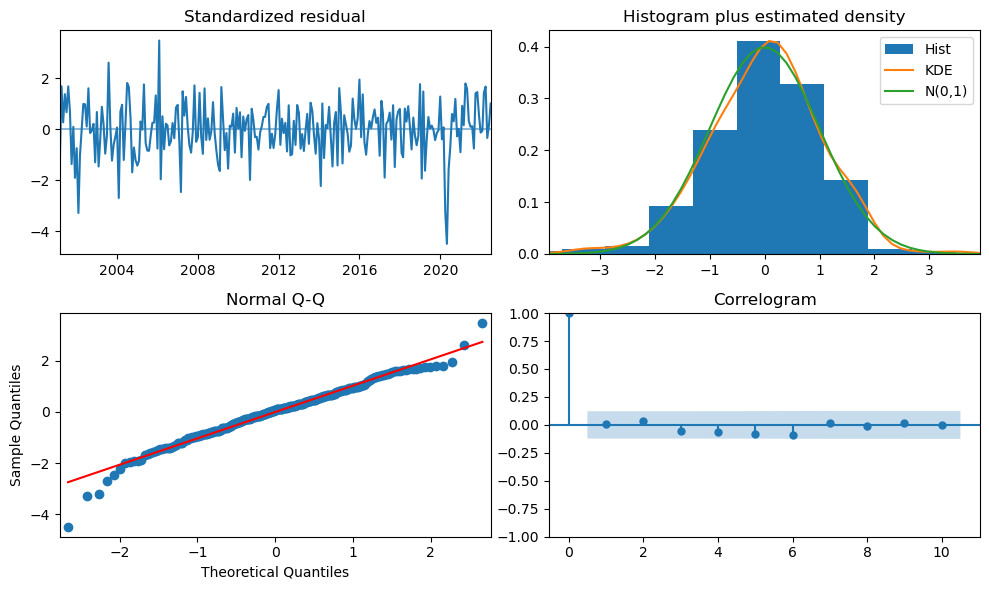

In [292]:
# Obtain diagnostic plots
fig = auto_model.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\wkyle\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 198.253
- MSE = 68,423.826
- RMSE = 261.579
- R^2 = 0.612
- MAPE = 4.01%


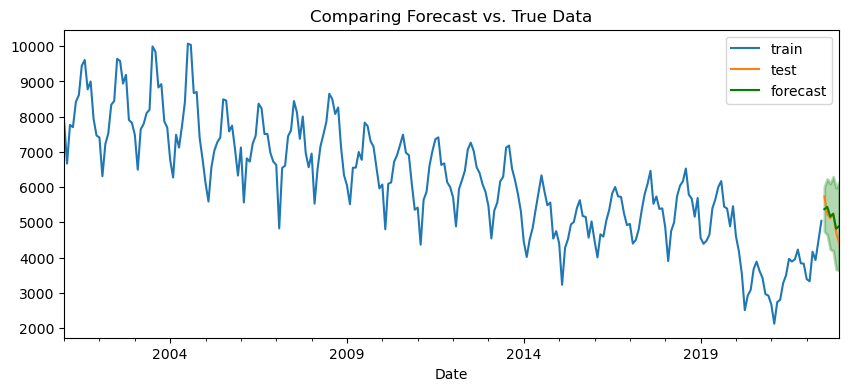

In [293]:
auto_model = tsa.ARIMA(
    train, order=auto_model.order, seasonal_order=auto_model.seasonal_order
).fit()


# Obtain forecast as a dataframe with confidence intervals
forecast_df = auto_model.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])



# Final auto arimas perform slightly better for both Battery and Theft. 

# Final evaluation Theft Info

In [294]:
final_value = forecast_df['mean'].iloc[-1]
final_value

4893.003168870505

In [295]:
starting_value = forecast_df['mean'].iloc[0]
starting_value

5374.308282220931

In [296]:
change = final_value - starting_value
change

-481.3051133504259

In [297]:
perc_change = (change / starting_value * 100)
perc_change

-8.955666256486627

# Of the two crimes, which is forecasted to have the highest monthly count at the end?
- Theft
# Of the two crimes, which is forecasted to have the highest net change?
- Theft
# Of the two crimes, which is forecasted to hav the highest perecent change?
- Theft